# Polynomial Curve Fitting
Give the following data:

$x_0, \dots, x_N$  
$y_0, \dots, y_N$

$$
\tilde{f}(x) = a x + b
$$

### Least Squares:
$$
\min_{a, b} \sum_{i=0}^{N} \left( y_i - \tilde{f}(x_i) \right)^2
$$

## Polynomial Curve Fitting

$$
\tilde{f}(x) = a_0 + a_1 x + a_2 x^2 + \dots + a_M x^M
$$

Where $M < N$.

$$
\tilde{f}(x) = a_0 P_0(x) + a_1 P_1(x) + \dots + a_M P_M(x)
$$


8641.180258950591
Max error: 6.8338751636735395


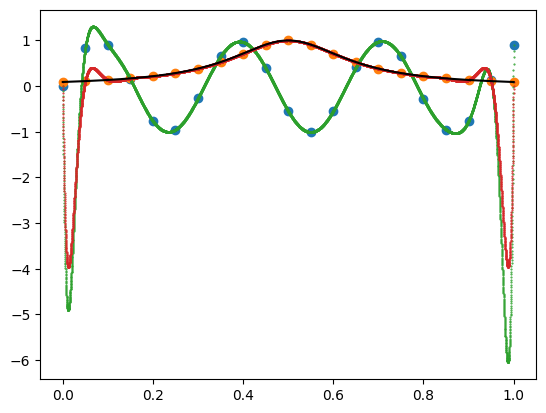

In [ ]:
from pylab import *
from numpy.polynomial import chebyshev

N = 20
# xp = (cos(linspace(0, pi, N+1)) + 1) / 2 #      array(linspace(0, 1, N+1), float32)
xp = array(linspace(0, 1, N+1), float32)
# print(xp)
yp = sin(xp * 20) + 0.01 * randn(N+1)
yp2 = array(1 / (1 + 40 * (xp - 0.5)**2), float32)
plot(xp, yp, 'o')
plot(xp, yp2, 'o')

x = linspace(0, 1, 10001)

A = transpose(chebyshev.chebval(xp * 2 - 1, eye(N+1)))
print(linalg.cond(A))
a = linalg.solve(A, yp)
a2 = linalg.solve(A, yp2)
y = chebyshev.chebval(x * 2 - 1, a)
y2 = chebyshev.chebval(x * 2 - 1, a2)

plot(x, y, '.', ms=1)
plot(x, y2, '.', ms=1)

yExact = sin(x * 20)
y2Exact = 1 / (1 + 40 * (x - 0.5)**2)
plot(x, y2Exact, 'k-')
# No Runge phenomenon
print('Max error:', max(abs(y - yExact)))
show()

# Polynomial Curve Fitting

### Gradient Descent Visualization

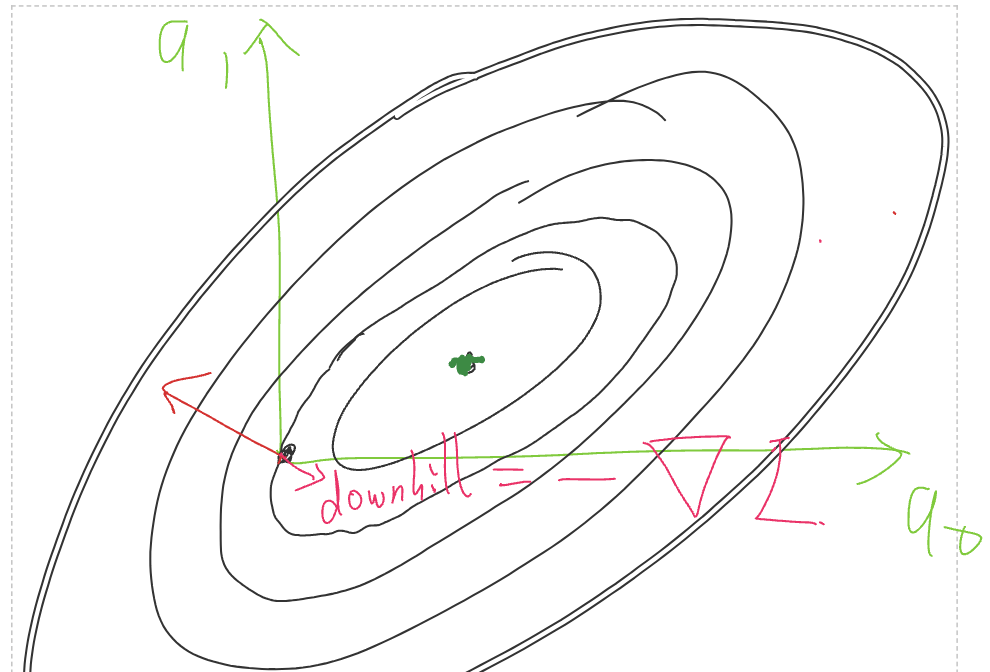
- The contour plot represents the loss function.
- The direction of the gradient is shown, indicating the downhill path for optimization.
- The parameters $a_0$ and $a_1$ are used in the optimization process.

### Loss Function:
$$
L = \sum_{i=0}^{N} \left( \tilde{f}(x_i) - y_i \right)^2
$$

### Gradient of the Loss Function:
$$
\nabla L =
\begin{pmatrix}
\frac{\partial L}{\partial a_0} \\
\vdots \\
\frac{\partial L}{\partial a_M}
\end{pmatrix}
$$

### Partial Derivative of the Loss Function:
$$
\frac{\partial L}{\partial a_k} = \sum_{i=0}^{N} 2 \left( \tilde{f}(x_i) - y_i \right) \frac{\partial \tilde{f}(x_i)}{\partial a_k}
$$

### Polynomial Curve Representation:
$$
\tilde{f}(x_i) = \sum_{k=0}^{M} a_k P_k(x_i)
$$

### Derivative of the Polynomial Function:
$$
\frac{d \tilde{f}(x_i)}{d a_k} = P_k(x_i)
$$

### Gradient in Matrix Form:
$$
\nabla L =
\begin{pmatrix}
P_0(x_0) & P_0(x_1) & \dots & P_0(x_N) \\
P_1(x_0) & P_1(x_1) & \dots & P_1(x_N) \\
\vdots & \vdots & \ddots & \vdots \\
P_M(x_0) & P_M(x_1) & \dots & P_M(x_N)
\end{pmatrix}
\begin{pmatrix}
\tilde{f}(x_0) - y_0 \\
\tilde{f}(x_1) - y_1 \\
\vdots \\
\tilde{f}(x_N) - y_N
\end{pmatrix}
$$


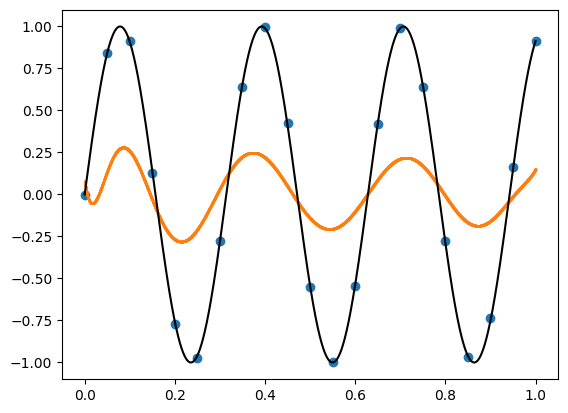

In [ ]:
from pylab import *
from numpy.polynomial import chebyshev

N = 20
M = 10
xp = array(linspace(0, 1, N+1), float32)
yp = sin(xp * 20) + 0.01 * randn(N+1)
# yp2 = array(1 / (1 + 40 * (xp - 0.5)**2), float32)
plot(xp, yp, 'o')
# plot(xp, yp2, 'o')

A = transpose([xp**k for k in range(M+1)])
A = transpose(chebyshev.chebval(xp * 2 - 1, eye(M+1)))
a = zeros(M+1)
ytilde = A @ a
error = ytilde - yp
gradient = 2 * A.T @ error

# gradient step
a -= 0.01 * gradient

x = linspace(0, 1, 10001)
y = transpose([x**k for k in range(M+1)]) @ a
y = chebyshev.chebval(x * 2 - 1, a)
plot(x, y, '.', ms=1)
# plot(x, y2, '.', ms=1)

yExact = sin(x * 20)
# y2Exact = 1 / (1 + 40 * (x - 0.5)**2)
plot(x, yExact, 'k-')
show()

**Note:** With more steps of the right step size $\eta$, gradient descent should converge to the optimal solution where the gradient is zero, i.e.,

$$
a^{(t+1)} = a^{(t)} - \eta \nabla L \quad \text{converges to} \quad \nabla L = 0.
$$

This aligns with the analytical solution obtained from the normal equation:

$$
(A^T A) a = A^T y.
$$


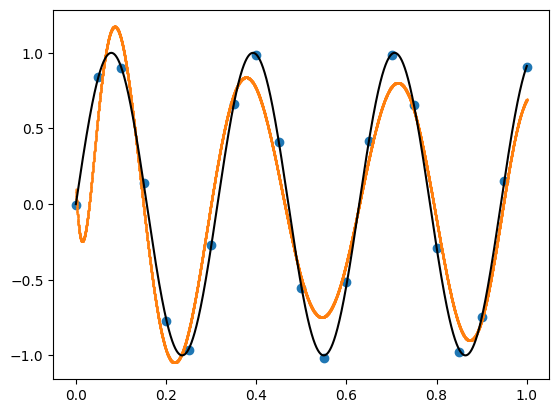

In [ ]:
from pylab import *
from numpy.polynomial import chebyshev

N = 20
M = 10
xp = array(linspace(0, 1, N+1), float32)
yp = sin(xp * 20) + 0.01 * randn(N+1)
# yp2 = array(1 / (1 + 40 * (xp - 0.5)**2), float32)
plot(xp, yp, 'o')
# plot(xp, yp2, 'o')

A = transpose([xp**k for k in range(M+1)])
A = transpose(chebyshev.chebval(xp * 2 - 1, eye(M+1)))
a = zeros(M+1)

for isteps in range(10):
    ytilde = A @ a
    error = ytilde - yp
    gradient = 2 * A.T @ error

    # gradient step
    a -= 0.01 * gradient

x = linspace(0, 1, 10001)
y = transpose([x**k for k in range(M+1)]) @ a
y = chebyshev.chebval(x * 2 - 1, a)
plot(x, y, '.', ms=1)
# plot(x, y2, '.', ms=1)

yExact = sin(x * 20)
# y2Exact = 1 / (1 + 40 * (x - 0.5)**2)
plot(x, yExact, 'k-')
show()

# Normal Equation

### Gradient of the Loss Function:

$$
\nabla L =
\begin{pmatrix}
P_0(x_0) & P_1(x_0) & \dots & P_M(x_0) \\
P_0(x_1) & P_1(x_1) & \dots & P_M(x_1) \\
\vdots & \vdots & \ddots & \vdots \\
P_0(x_N) & P_1(x_N) & \dots & P_M(x_N)
\end{pmatrix}
\begin{pmatrix}
\tilde{f}(x_0) - y_0 \\
\tilde{f}(x_1) - y_1 \\
\vdots \\
\tilde{f}(x_N) - y_N
\end{pmatrix}
= 0
$$

where the $a$'s are optimal.

### Matrix Representation:

$$
\begin{pmatrix}
\tilde{f}(x_0) \\
\vdots \\
\tilde{f}(x_N)
\end{pmatrix}
=
\begin{pmatrix}
A
\end{pmatrix}
\begin{pmatrix}
a_0 \\
\vdots \\
a_M
\end{pmatrix}
$$

### Derivation of the Normal Equation:

$$
\nabla L = 2 A^T (A a - y) = 0
$$

which simplifies to:

$$
(A^T A) a = A^T y
$$

- $(M+1) \times (M+1)$ matrix on the left
- $(M+1) \times 1$ vector for $a$
- $(M+1) \times 1$ vector for $A^T y$

### QR Factorization Approach:

$$
A = Q R
$$

where:
- $A$ is $(N+1) \times (M+1)$
- $Q$ is $(N+1) \times (M+1)$
- $R$ is $(M+1) \times (M+1)$

$$
Q^T Q = I
$$

Using this factorization:

$$
A^T A = R^T Q^T Q R = R^T R
$$

$$
A^T y = R^T Q^T y
$$

Thus, solving for $a$:

$$
R a = Q^T y
$$


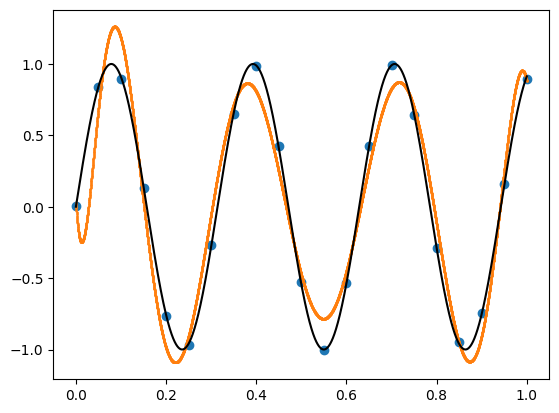

In [ ]:
from pylab import *
from numpy.polynomial import chebyshev

N = 20
M = 10
xp = array(linspace(0, 1, N+1), float32)
yp = sin(xp * 20) + 0.01 * randn(N+1)
plot(xp, yp, 'o')

A = transpose(chebyshev.chebval(xp * 2 - 1, eye(M+1)))
a = linalg.solve(A.T @ A, A.T @ yp)

x = linspace(0, 1, 10001)
y = chebyshev.chebval(x * 2 - 1, a)
plot(x, y, '.', ms=1)

yExact = sin(x * 20)
plot(x, yExact, 'k-')
show()

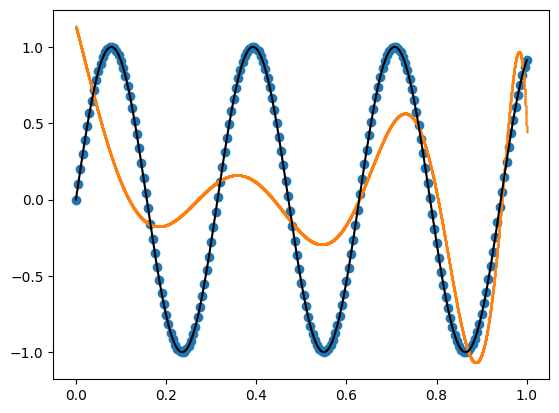

In [ ]:
from pylab import *
from numpy.polynomial import chebyshev

N = 200
M = 15
xp = array(linspace(0, 1, N+1), float32)
yp = sin(xp * 20)
plot(xp, yp, 'o')

A = transpose([xp**k for k in range(M+1)])
a = linalg.solve(A.T @ A, A.T @ yp)

x = linspace(0, 1, 10001)
y = transpose([x**k for k in range(M+1)]) @ a
plot(x, y, '.', ms=1)

yExact = sin(x * 20)
plot(x, yExact, 'k-')
show()

The normal equation

$$
(A^T A) a = A^T y
$$

involves the term $A^T A$, which squares the condition number of $A$. This can amplify numerical instability, especially when $A$ is ill-conditioned. To mitigate this, we use QR factorization to improve numerical stability before solving for $a$.


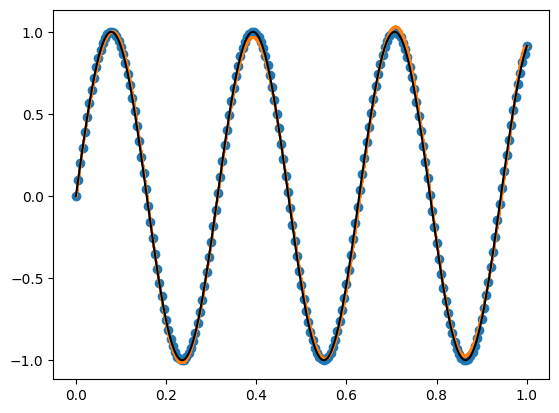

In [ ]:
from pylab import *
from numpy.polynomial import chebyshev

N = 200
M = 15
xp = array(linspace(0, 1, N+1), float32)
yp = sin(xp * 20)
plot(xp, yp, 'o')

A = transpose([xp**k for k in range(M+1)])
Q, R = linalg.qr(A)
a = linalg.solve(R, Q.T @ yp)

x = linspace(0, 1, 10001)
y = transpose([x**k for k in range(M+1)]) @ a
plot(x, y, '.', ms=1)

yExact = sin(x * 20)
plot(x, yExact, 'k-')
show()
